Olivetti Dataset

Brief information about Olivetti Dataset:

Face images taken between April 1992 and April 1994.
There are ten different image of each of 40 distinct people
There are 400 face images in the dataset
Face images were taken at different times, variying ligthing, facial express and facial detail
All face images have black background
The images are gray level
Size of each image is 64x64
Image pixel values were scaled to [0, 1] interval
Names of 40 people were encoded to an integer from 0 to 39

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import pandas as pd



In [110]:
data=np.load("face_cluster_data/olivetti_faces.npy")
target=np.load("face_cluster_data/olivetti_faces_target.npy")

In [111]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [112]:
print(data.shape)
print("{} images in the dataset".format(len(data)))
print("{} unique targets ".format(len(np.unique(target))))
print("size of image:{}*{}".format(data.shape[1],data.shape[2]))
print("pixel values for 1 row:{}".format(data[0][:,:]))
print("unique target number:{}".format(np.unique(target)))


(400, 64, 64)
400 images in the dataset
40 unique targets 
size of image:64*64
pixel values for 1 row:[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
 ...
 [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]
unique target number:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


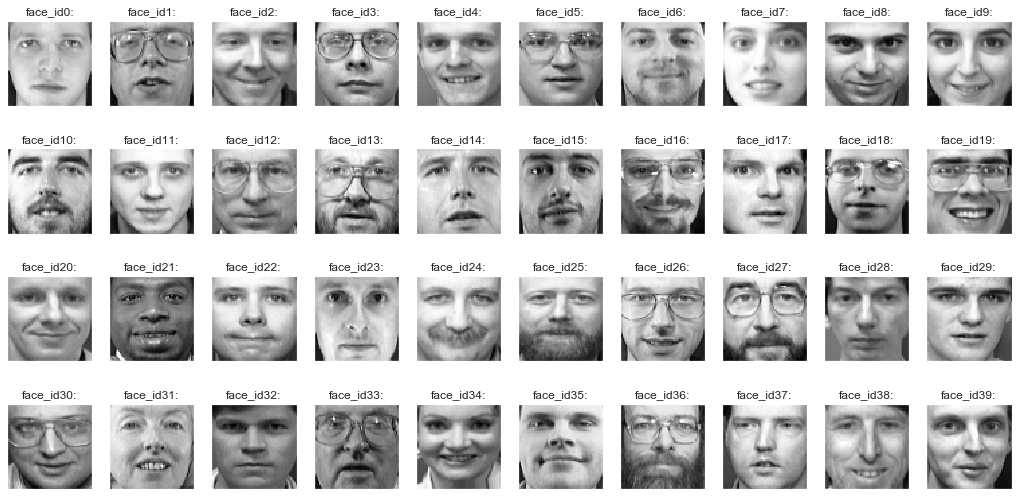

In [113]:
def show_unique_image(data, ids):
    # create a subplot for 40 people in 4*10
    fig, ax = plt.subplots(4,10,figsize=(18,9))
    # change ndarray :4*10 matrix into array for iteration of imshow 
    ax = ax.flatten()
    
    for unique_id in ids:
        image_idx = unique_id * 10
        ax[unique_id].imshow(data[image_idx],cmap= 'gray')
        ax[unique_id].set_xticks([])
        ax[unique_id].set_yticks([])
        ax[unique_id].set_title("face_id{}:".format(unique_id))
show_unique_image(data, np.unique(target))
                   

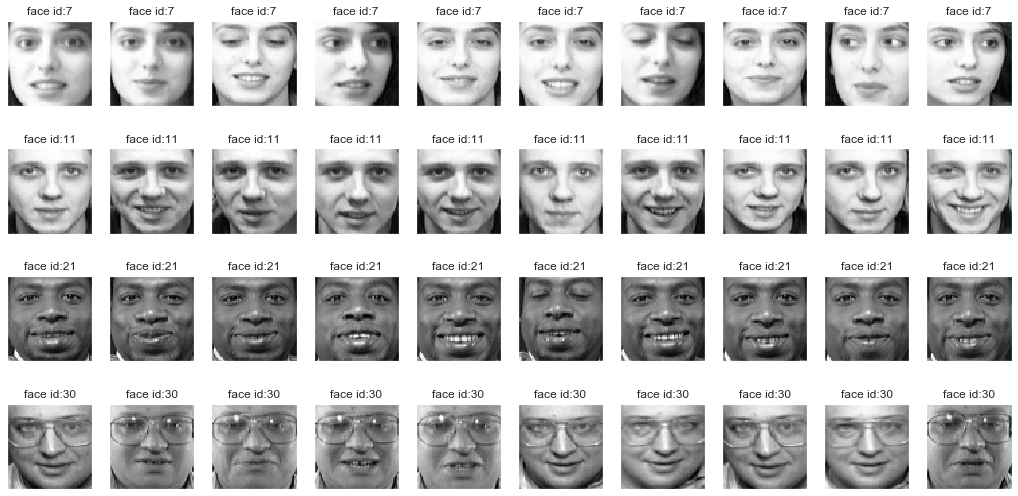

In [114]:
def show_selected_person(data, selected_ids):
    cols = 10
    rows = len(selected_ids) 
    fig , ax = plt.subplots(rows, cols, figsize = (18,9))
    
    #ax = ax.flatten()
    
    for i, _id in enumerate(selected_ids):
        for j in range(cols):
            image_index = _id * 10 + j
            ax[i,j].imshow(data[image_index],cmap = 'gray')
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            ax[i,j].set_title("face id:{}".format(_id))
            
show_selected_person(data, selected_ids=[7,11,21,30])

#each face has different lighting, face expression, other accessaries like glasses,beard, different sexes

In [115]:
# split data for training
data_reshape = data.reshape(data.shape[0], data.shape[1]* data.shape[1])
print(data_reshape.shape)
print(target.shape)

(400, 4096)
(400,)


In [116]:

X_train, X_test, y_train, y_test = train_test_split (data_reshape, target, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_train)

print(y_train.shape)



(280, 4096)
[[0.57024795 0.59917355 0.6487603  ... 0.0661157  0.08264463 0.09504132]
 [0.12809917 0.3140496  0.553719   ... 0.30578512 0.30578512 0.3181818 ]
 [0.3677686  0.45454547 0.5123967  ... 0.15289256 0.1570248  0.16115703]
 ...
 [0.55785125 0.60330576 0.6570248  ... 0.17768595 0.20661157 0.19421488]
 [0.5206612  0.5206612  0.53305787 ... 0.46694216 0.43801653 0.43801653]
 [0.3966942  0.3677686  0.3429752  ... 0.37190083 0.26859504 0.29752067]]
(280,)


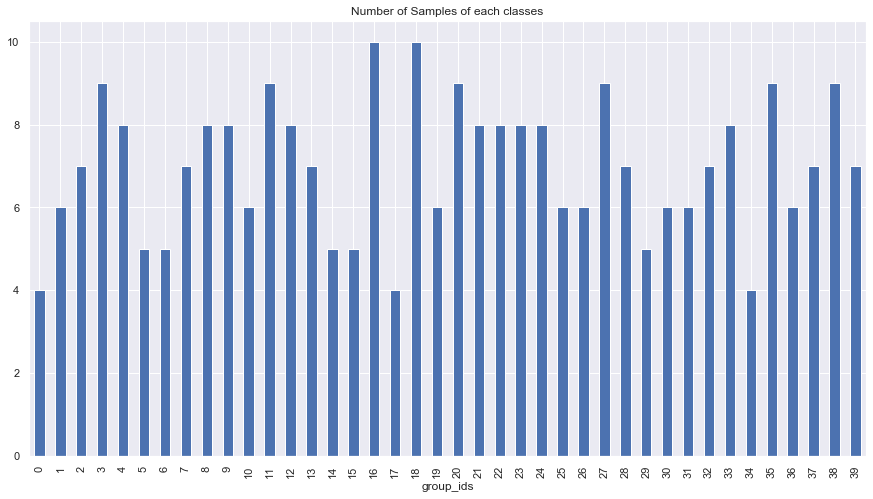

In [117]:
y_frame = pd.DataFrame()
y_frame['group_ids'] = y_train
y_frame.groupby(['group_ids']).size().plot(kind = 'bar',figsize = (15,8), title = "Number of Samples of each classes")

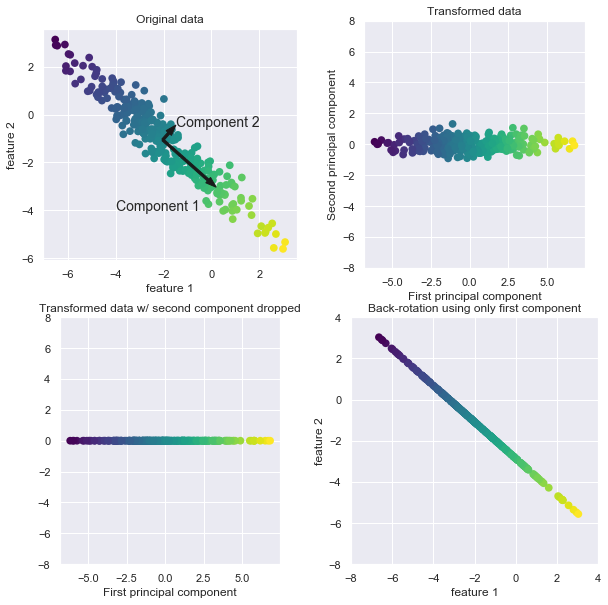

In [118]:
#reduce data size, the dimension of data reduced,using PCA
import mglearn
mglearn.plots.plot_pca_illustration()


In [142]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data_reshape)
X_pca = pca.transform(data_reshape)
print(X_pca.shape)


(400, 2)


Text(0.5, 1.0, 'PCA projection of 40 people')

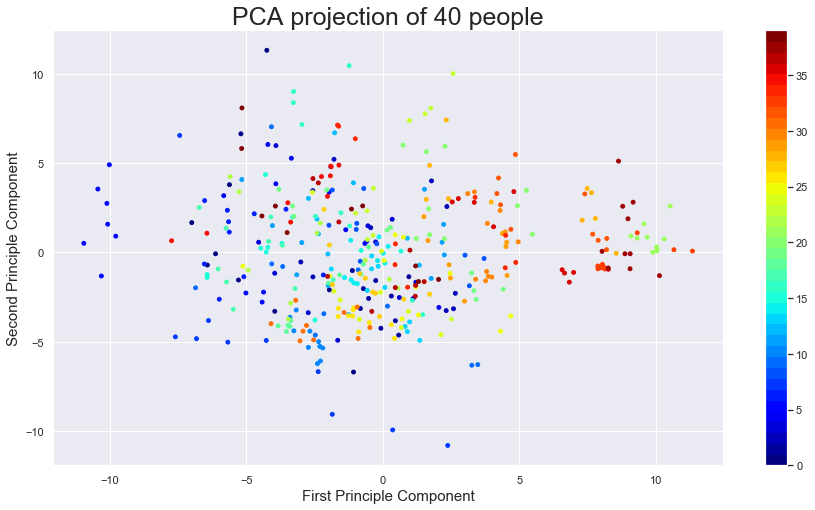

In [120]:
number_of_people = 40
index_range = number_of_people * 10
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(X_pca[:index_range,0],
                    X_pca[:index_range,1],
                    c = target[:index_range],
                    s =15,
                    cmap = plt.get_cmap('jet', number_of_people)
                    )
fig.colorbar(scatter)
ax.set_xlabel("First Principle Component", size = 15)
ax.set_ylabel("Second Principle Component", size = 15)
ax.set_title("PCA projection of {} people".format(number_of_people),size =25)

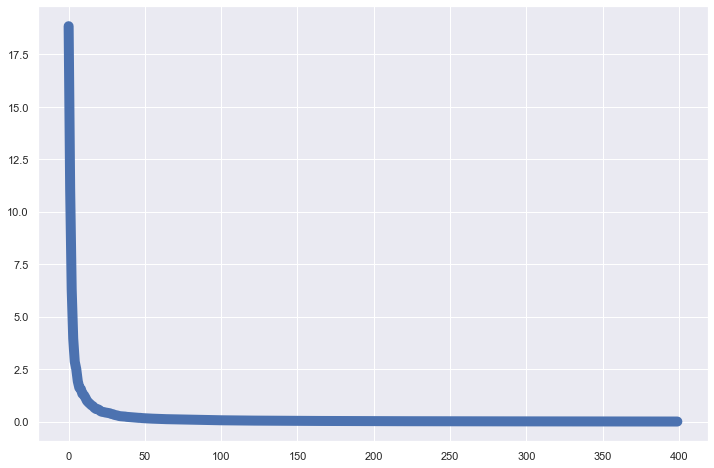

In [121]:
pca = PCA()
pca.fit(data_reshape)

#find optimum number of principle component --> #component = 100
plt.figure(figsize=(12,8))
pca_var = pca.explained_variance_
plt.plot(pca_var, linewidth = 10)
plt.show()


In [146]:
pca = PCA(n_components = 100)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
#print(X_train_pca)
pca_mean = X_train.mean(axis = 0)
#pca_mean = pca.mean_
print('mean of pca:',pca_mean)


mean of pca: [0.39697462 0.43072617 0.47464582 ... 0.3162485  0.31354782 0.31264758]


Text(0.5, 1.0, 'Averaged Face')

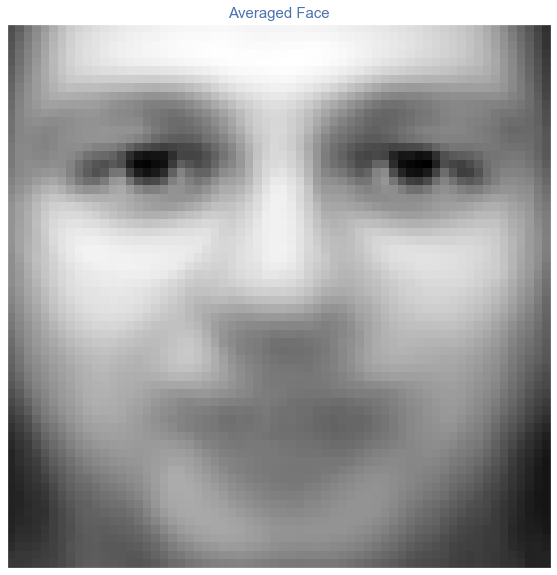

In [123]:
#show average face
fig,ax = plt.subplots(1,1, figsize =(10,10))
ax.imshow(pca_mean.reshape((64,64)),cmap = 'gray')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Averaged Face', size = 15, color ='b')

In [124]:
#show eigen face
pca.components_.shape

(100, 4096)

Text(0.5, 0.98, 'All Eigen Faces')

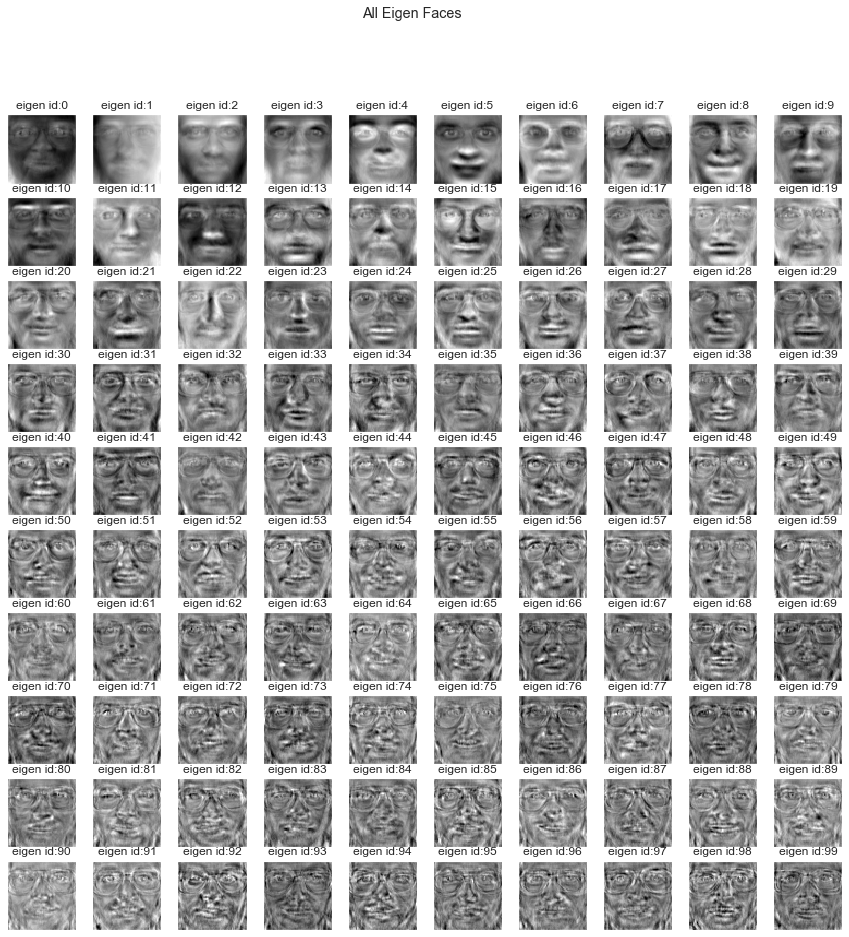

In [125]:
num_of_eigenfaces=len(pca.components_)
eigenfaces = pca.components_.reshape(num_of_eigenfaces,data.shape[1], data.shape[2])

cols=10
rows=int(num_of_eigenfaces/cols)
fig, ax=plt.subplots(rows, cols, figsize=(15,15))
ax=ax.flatten()
for i in range(num_of_eigenfaces):
    ax[i].imshow(eigenfaces[i],cmap="gray")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [126]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
X_pca = pca.transform(data_reshape)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


models=[]
models.append(("LR",LogisticRegression()))
models.append(("SVM",SVC(probability = True)))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))


acc = []
probs = []
for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(accuracy))
   
    
    



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


========== LR RESULT ==========
Accuracy score:0.96
========== SVM RESULT ==========
Accuracy score:0.85
========== NB RESULT ==========
Accuracy score:0.78
========== KNN RESULT ==========
Accuracy score:0.71
========== DT RESULT ==========
Accuracy score:0.46


In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

for name, model in models:
    pca = PCA(n_components = 100)
    pca.fit(data_reshape)
    X_pca = pca.transform(data_reshape)
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


LR mean cross validations score:0.97


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

SVM mean cross validations score:0.93
NB mean cross validations score:0.76
KNN mean cross validations score:0.80
DT mean cross validations score:0.46


In [129]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.75      0.86         4
           2       0.17      0.33      0.22         3
           3       0.25      1.00      0.40         1
           4       0.50      1.00      0.67         2
           5       1.00      0.80      0.89         5
           6       0.00      0.00      0.00         5
           7       0.67      0.67      0.67         3
           8       0.00      0.00      0.00         2
           9       0.50      0.50      0.50         2
          10       1.00      1.00      1.00         4
          11       0.00      0.00      0.00         1
          12       0.25      0.50      0.33         2
          13       0.67      0.67      0.67         3
          14       0.36      1.00      0.53         5
          15       0.50      0.40      0.44         5
          16       0.00      0.00      0.00         0
   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


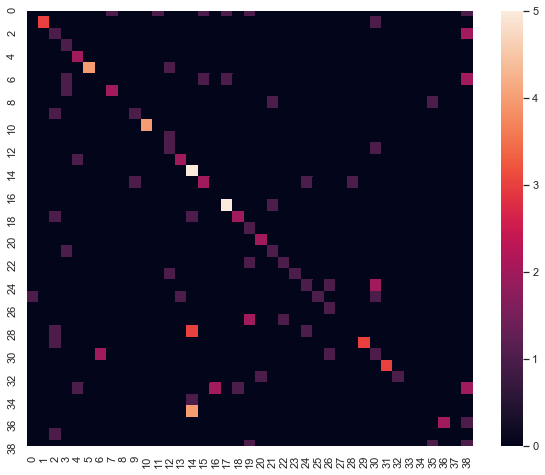

In [147]:
import seaborn as sns
sns.set()
cm=metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(10,8))
sns.heatmap(cm)


In [131]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Target=label_binarize(target, classes=range(40))
print(Target.shape)
print(Target[0:10])

n_classes=Target.shape[1]

(400, 40)
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]


In [132]:
X_train_multiclass, \
X_test_multiclass, \
y_train_multiclass, \
y_test_multiclass=\
train_test_split(data_reshape, Target, test_size=0.3, stratify=Target, random_state=0)

In [133]:
pca=PCA(n_components=100, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca=pca.transform(X_train_multiclass)
X_test_multiclass_pca=pca.transform(X_test_multiclass)

In [134]:
lr=LogisticRegression(penalty="l2")
lr.fit(X_train_pca, y_train)
print("lr score:{:.2f}".format(lr.score(X_test_pca, y_test)))


lr score:0.96


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [135]:
oneRestClassifier=OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score=oneRestClassifier.decision_function(X_test_multiclass_pca)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

In [136]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i],
                                                        y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(),
    y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.97


(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.97')

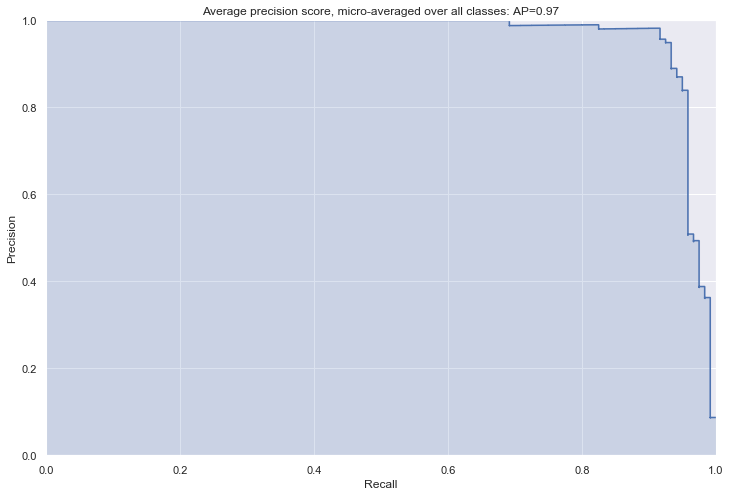

In [140]:
from funcsigs import signature

#plt.fill_between:Fill the area between two horizontal curves.
#the curves are defined by the points (x, y1) and (x, y2). 
print(signature(plt.fill_between))


kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(1, figsize=(12,8))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
#'post': The y value is continued constantly to the right from every x position
# i.e. the interval [x[i], x[i+1]) has the value y[i].
plt.step(x = recall['micro'],  y = precision['micro'], color='b', alpha=1, where = 'post')
#plt.step(recall['micro'], precision['micro'], color='b', alpha=1)
plt.fill_between(x=recall["micro"], y1 = precision["micro"], alpha=0.2, color='b',
                 **kwargs)


plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))